In [2]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
beginyear = "1950"
endyear = "2021"

url= f"https://www.ncdc.noaa.gov/cag/national/time-series/110-tavg-12-12-{beginyear}-{endyear}.json?base_prd=true&begbaseyear=1901&endbaseyear=2000"

temp_data = pd.DataFrame(columns=['Year','Average_Temp'])
data = requests.get(url).json()
values = data['data']

for year in values:
    temp = values[year]['value']
    temp_data = temp_data.append({'Year': year[:4],'Average_Temp':temp},ignore_index=True)
    

# display(temp_data)
temp_data.to_csv("temperature_average/average_temp.csv",index=False)


In [4]:
temp_data = temp_data.astype({'Year':'int','Average_Temp':'float'})

r^2 correlation between year and US average temp: 0.4110981281894061


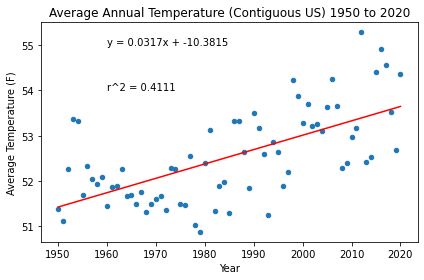

The predicted average temperature in 2022 is 53.71 degrees F


In [8]:
temp_data.plot('Year','Average_Temp',kind='scatter')
(slope, intercept, rvalue, pvalue, stderr) = linregress(temp_data['Year'], temp_data['Average_Temp'])
print(f'r^2 correlation between year and US average temp: {rvalue**2}')
regress_values = temp_data['Year'] * slope + intercept
plt.plot(temp_data['Year'],regress_values,color='red')
plt.text(1960,54,f"r^2 = {round((rvalue**2),4)}")
plt.text(1960,55,f"y = {round(slope,4)}x + {round(intercept,4)}")

plt.title('Average Annual Temperature (Contiguous US) 1950 to 2020')
plt.ylabel('Average Temperature (F)')
plt.tight_layout()
plt.savefig("temp_vs_year.png")
plt.show()
print(f"The predicted average temperature in 2022 is {round((2022*slope+intercept),2)} degrees F")